# Exercise 2: Comparing data to predictions (20 points)

The exercise this week will allow you to gain some experience with comparing data to predictions, such as how well two variables are correlated.

### Tips for completing this exercise

- Use **exactly** the same variable names as in the instructions because your answers will be automatically graded, and the tests that grade your answers rely on following the same formatting or variable naming as in the instructions.
- **Please do not**:

    - **Change the file names**. Do all of your editing in the provided `Exercise-2-problems-1-3.ipynb` file (this file).
    - **Copy/paste cells in this notebook**. We use an automated grading system that will fail if there are copies of code cells.
    - **Change the existing cell types**. You can add cells, but changing the cell types for existing cells (from code to markdown, for example) will also cause the automated grader to fail.

In [1]:
# This one is helpfull to fully understand the concept of least-squares-regression
# https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/least-squares-regression/v/calculating-the-equation-of-a-regression-line

## AI tool usage agreement

**Enter your name in the cell below** to confirm that you have followed the [course guidelines on the use of AI tools](https://introqg-site.readthedocs.io/en/latest/general-info/ai-tools.html) and understand that misuse of AI tools is considered cheating.

My name

## Problem 1: Linear data regression for detecting changing climate (8.5 points)

For this problem we will again use the NOAA climate data from Exercises 6 and 7 of the [Geo-Python course](https://geo-python.github.io) with a slight twist. As a reminder, you will be working with a climate data file from the [US National Oceanographic and Atmospheric Administration (NOAA) climate database](https://www.ncdc.noaa.gov/cdo-web/). In order to jump right into things, we have provided you with [a data file that has already been processed](data/seasonal-temps.csv) containing the means and standard deviations of seasonal temperatures (in Celsius) for winter and summer for the years 1953-2019. The first 5 lines of the data file are:

```
Year,Winter mean,Winter std,Summer mean,Summer std
1953,-5.600255,6.126864,16.406055,3.934636
1954,-6.244444,6.804128,15.292479,3.890385
1955,-4.430118,6.128557,16.218130,5.347337
1956,-10.640902,8.521185,14.641628,4.101369
```

Your task is to load this data and use a least squares regression to fit trendlines to the temperature data.

*If you're looking for a challenge, you are welcome to load in the [original data file from Exerise 6 (029740.txt)](https://geo-python-site.readthedocs.io/en/latest/notebooks/L6/advanced-data-processing-with-pandas.html) and process it as was done for Exercises 6 and 7 as a starting point for this problem. As a reminder, the original data file has daily mean, minimum, and maximum temperatures for the Helsinki-Vantaa airport weather station from January 1952-October 2019. Be aware that if you process the data yourself you may get slightly different values for the calculations below.*

### Scores for this problem

**Your score on this problem will be based on following criteria**:

- Reading the in the data file for this exercise
- Properly converting the linear regressions formulas to a Python function and adding it to your `introqg_functions.py` script file from Exercise 1
- Calculating the least-squares regression lines for summer and winter, for two different time periods
- Plotting your results
- Including comments that explain what most lines in the code do
- Uploading your notebook **and script file** to your GitHub repository for this week's exercise

### Part 0: Copying and testing your script file from Exercise 1 (0 points)

The first task in this problem is to copy your `introqg_functions.py` script file from Exercise 1 to the directory containing this notebook and then run the cell below to ensure it has been copied and is functioning as expected. Note: We will only check some of the functions in this file using the tests below, not all of them.

- Copy your `introqg_functions.py` script file from Exercise 1 to the directory containing this notebook
- Run the tests below

In [2]:
# !mv ../Exercise-1/introqg_functions.py introqg_functions.py

In [3]:
# These tests with a small list should work
from nose.tools import assert_equal
from introqg_functions import mean, stddev, stderr

# Test mean function with some lists
list1 = [4, 2, 8, -2, -10]

# Calculate list means
list1_mean = mean(list1)
list1_stddev = stddev(list1)
list1_stderr = stderr(list1)

# Print mean values
print(f"Mean for list1: {list1_mean:.3f}.")
print(f"Standard deviation for list1: {list1_stddev:.3f}.")
print(f"Standard error for list1: {list1_stderr:.3f}.")

# Check that the mean values are correct
assert_equal(round(list1_mean, 3), 0.400)
assert_equal(round(list1_stddev, 3), 6.119)
assert_equal(round(list1_stderr, 3), 2.736)

# Print message if it is safe to continue
print("\nAll tests pass! You are ready to proceed with this exercise.")

Mean for list1: 0.400.
Standard deviation for list1: 6.119.
Standard error for list1: 2.736.

All tests pass! You are ready to proceed with this exercise.


### Part 1: Reading the data file (1 point)

Your first task is to read in [the data file for this problem](data/seasonal-temps.csv).

- For this, you should use the Pandas `read_csv()` funtion to read in the data file [data/seasonal-temps.csv](data/seasonal-temps.csv) into the variable `data`
    - You do not need to skip any rows or specify an index column

In [4]:
# Import Pandas and NumPy
import pandas as pd

data = None

# YOUR CODE HERE
url = "data/seasonal-temps.csv"
data = pd.read_csv(url)

In [5]:
# This test should print the first row of the data file
print("First row of the DataFrame:\n", data.head(1))


First row of the DataFrame:
    Year  Winter mean  Winter std  Summer mean  Summer std
0  1953    -5.600255    6.126864    16.406055    3.934636


### Part 2: A linear regression function (1.5 points)

Your next task in this problem is to create a function that calculates the slopes `B` and *y*-intercepts `A` for [unweighted linear regression lines](https://introqg-site.readthedocs.io/en/latest/notebooks/L2/least-squares.html). As you may recall from the lesson, `A` and `B` can be calculated as

\begin{equation}
  \Large
  A = \frac{\sum{x^2} \sum{y} - \sum{x} \sum{x y}}{\Delta}
\end{equation}

and

\begin{equation}
  \Large
  B = \frac{N \sum{x y} - \sum{x} \sum{y}}{\Delta},
\end{equation}

where

\begin{equation}
  \Large
  \Delta = N \sum{x^2} - \left(\sum{x} \right)^2.
\end{equation}

- Create a function `linregress` in your `introqg_functions.py` script file that returns the slope `B` and *y*-intercept `A` for a regression line for data `x` and `y`.
    - **NOTE**: You can return both `A` and `B` in the same `return` statement by separating the values with a comma
    - **NOTE**: You may need to restart your kernel in order for the new function to be imported. You may receive an `ImportError` otherwise.

In [6]:
# Import your new function below using the format "from introqg_functions import linregress"
# (just copy and paste the text in quotes above in place of "raise NotImplementedError()")

# YOUR CODE HERE
from introqg_functions import linregress

In [7]:
# These visible tests with fake data should work
import numpy as np
from nose.tools import ok_, assert_equal

# Fake data for linregress tests
x1 = np.array([1.0, 2.0])
y1 = np.array([1.0, 2.0])
x2 = np.array([1.0, 2.0, 2.5, 3.6, 4.2, 5.9])
y2 = np.array([1.0, 2.0, 2.7, 3.1, 4.7, 5.7])

# Fake line slopes, intercepts
a1, b1 = linregress(x1, y1)
a2, b2 = linregress(x2, y2)

# Print results
print(f"Slope and intercept for dataset 1: {b1:.4f} and {a1:.4f}.")
print(f"Slope and intercept for dataset 2: {b2:.4f} and {a2:.4f}.")

# Check that the linregress function works
assert_equal(a1, 0.0)
assert_equal(b1, 1.0)
assert_equal(round(a2, 4), 0.0799)
assert_equal(round(b2, 4), 0.975)

Slope and intercept for dataset 1: 1.0000 and 0.0000.
Slope and intercept for dataset 2: 0.9750 and 0.0799.


### Part 3: Calculating seasonal regression lines (1.5 points)

Now we can calculate the slopes and y-intercepts for our weather data to determine how summer and winter temperatures have varied over the observation period. We'll do this for two time ranges: The **entire observation period** and the **last ~20 years (2000-2019)**.

- Use your `linregress` function to calculate the slopes and intercepts for summer and winter for the time periods mentioned above (the entire range of years, and 2000-2019).
You should name these values as follows:
    - Entire range of years: `A_winter` and `B_winter` for winter, `A_summer` and `B_summer` for summer
    - Last 20 years: `A_winter20` and `B_winter20` for winter, `A_summer20` and `B_summer20` for summer

**Hint**: In this problem, `x` will be your time data, and `y` will be your temperatures.

In [8]:
# Your calculations go below.
# Note: Replace both of the 'None' values with a single call of linregress() on each line
A_winter, B_winter = None, None
A_summer, B_summer = None, None
A_winter20, B_winter20 = None, None
A_summer20, B_summer20 = None, None

# YOUR CODE HERE
x = np.array(data.Year)
winter = np.array(data["Winter mean"])
summer = np.array(data["Summer mean"])

data_20 = data[(data["Year"] >= 2000) & (data["Year"] <= 2019)].copy()
x_20 = np.array(data_20.Year)
winter_20 = np.array(data_20["Winter mean"])
summer_20 = np.array(data_20["Summer mean"])

A_winter, B_winter = linregress(x, winter)
A_summer, B_summer = linregress(x, summer)
A_winter20, B_winter20 = linregress(x_20, winter_20)
A_summer20, B_summer20 = linregress(x_20, summer_20)

In [9]:
# This test should work
print(f"Winter (all years) slope: {B_winter:.4f}. Expected value: 0.0451.")
print(f"Winter (all years) intercept {A_winter:.1f}. Expected value: -94.5.")


Winter (all years) slope: 0.0451. Expected value: 0.0451.
Winter (all years) intercept -94.5. Expected value: -94.5.


In [10]:
# This test should work
print(f"Summer (last 20 years) slope: {B_summer20:.4f}. Expected value: 0.0028.")
print(f"Summer (last 20 years) intercept: {A_summer20:.1f}. Expected value: 11.1.")


Summer (last 20 years) slope: 0.0028. Expected value: 0.0028.
Summer (last 20 years) intercept: 11.1. Expected value: 11.1.


### Part 4: Plotting your results (4.5 points)

Your last coding task for this problem is to create some plots of your seasonal temperature data and their trendlines. An example of the types of plots you should create are below.
**Note**: You should create two separate plots for the different time periods, not use subplots as shown in the example below.

![Temperature trends in Helsinki](img/temp-slopes.png)

- Create 2 plots of the seasonal temperature data: (**1**) one for the entire time covered in the data and (**2**) another for the last 20 years of data
    - Plot the seasonal average temperature data as a Pandas scatter plot with error bars showing the standard deviation in seasonal temperature
    - Also plot the regression lines for each season as well to compare to the yearly temperature data. You may want to consult [the hints for this week's exercise](https://introqg-site.readthedocs.io/en/latest/lessons/L2/exercise-2.html) about how to plot the regression lines.
    - Plot the temperature data for both seasons on the same plot, using a warm color (e.g., red) for summer and a cool color (e.g., blue) for winter. You can find some convenient color names you can use in the [Matplotlib documentation online](https://matplotlib.org/stable/gallery/color/named_colors.html).
    - Be sure to set the figure size to be slightly larger, as was done in Exercise 1
- Include axis labels, a title and a legend for each plot, as well as text displaying the slope of the regression lines for both the summer and winter seasons
    - If your plot legend is empty, be sure that you have a label included for the scatter plot for each season with the text name of that season
- Add figure captions in the Markdown cell below each Python cell for your plots that describe the plots as if they were in a scientific journal article

/tmp/ipykernel_2800/4187601662.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(label) for label in ax.get_xticks()])


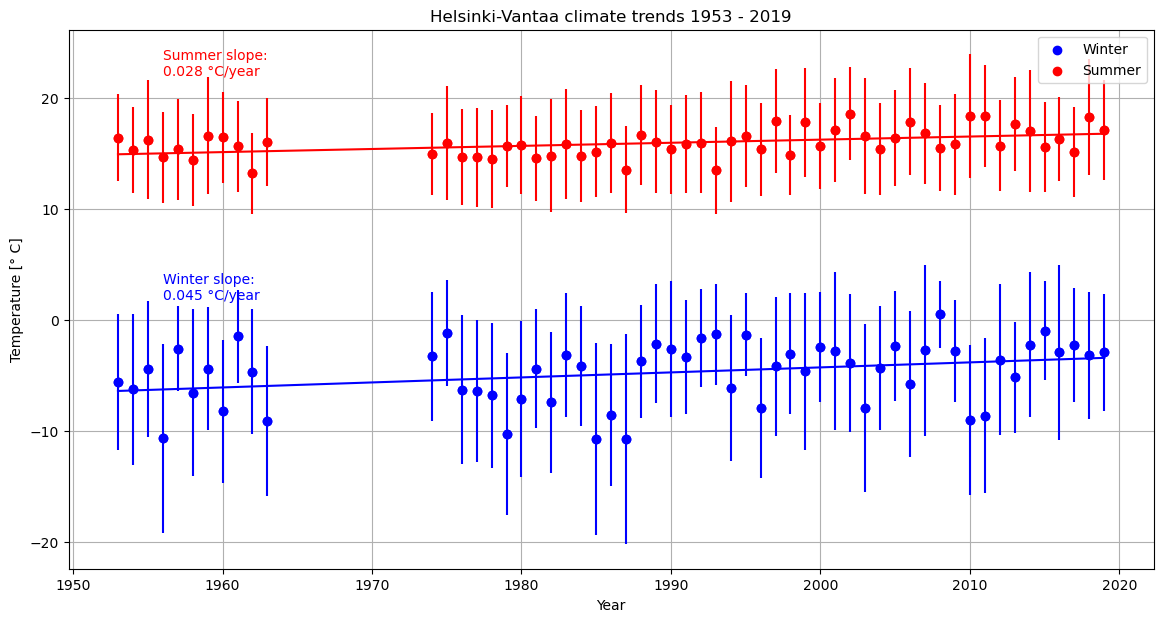

In [11]:
# Plot for all years goes here

ax = None

# YOUR CODE HERE
import matplotlib.pyplot as plt

data["Winter_mean_pred"] = A_winter + B_winter * data.Year
data["Summer_mean_pred"] = A_summer + B_summer * data.Year

data_20["Winter_mean_pred"] = A_winter20 + B_winter20 * data_20.Year
data_20["Summer_mean_pred"] = A_summer20 + B_summer20 * data_20.Year

# Preparing data for full year
years = data['Year']
winter_means = data['Winter mean']
winter_std = data['Winter std']
summer_means = data['Summer mean']
summer_std = data['Summer std']
slopes = {"Winter": B_winter, "Summer": B_summer}
          
# Preparing data for data_20
years_20 = data_20['Year']
winter_means_20 = data_20['Winter mean']
winter_std_20 = data_20['Winter std']
summer_means_20 = data_20['Summer mean']
summer_std_20 = data_20['Summer std']
slopes_20 = {"Winter": B_winter20, "Summer": B_summer20}

# Creating a figure and an axes
# I am still using subplots, but for producing two plots
fig1, ax1 = plt.subplots(figsize=(14, 7))

# Plotting function for a given dataset
def plot_data(fig, ax, 
              years, 
              winter_means, 
              winter_std, 
              summer_means, 
              summer_std, 
              data,
              slopes,
              r_values = False,
              error_bars=True
                 ):
    
    my_plot_data = {
        "Winter_mean_pred": ['Winter', winter_means, winter_std, "blue"],
        "Summer_mean_pred": ['Summer', summer_means, summer_std, "red"]
    }
    for season, ids in my_plot_data.items():
        label, y, yerr, color = ids

        # Plotting point mean values for each year 
        scatter_plot = ax.scatter(years, y=y, label=label, color=color)

        if error_bars:
            # Plotting error bar
            ax.errorbar(years, y=y, yerr=yerr, fmt='o', capsize=0, color=color)
                        
            # Adding a custom text label for the slope line    
            slope = round(slopes[label], 3)
            text_label = f"""{label} slope:\n{slope} °C/year"""
            x_delta, y_delta = 3, 5

        if r_values:
            r = round(r_values[label], 3)
            text_label = f"""{label}\nCorrelation Coefficient (r):\n{r}"""
            x_delta, y_delta = 2, -5
            
        ax.text(years.min() + x_delta, 
                data[season].max() + y_delta,
                s=text_label, 
                color=color,
                verticalalignment='bottom', horizontalalignment='left')

        # Plotting trend line
        ax.plot(years, data[season], color=color)

        ax.legend()
    ax.set_title(f"Helsinki-Vantaa climate trends {data.Year.min()} - {data.Year.max()}")
    ax.grid()
    ax.set_xlabel('Year')
    ax.set_ylabel('Temperature [° C]')
    ax.set_xticklabels([int(label) for label in ax.get_xticks()])

# Call the plotting function for both data and data_20
plot_data(fig1, ax1, years, winter_means, winter_std, summer_means, summer_std, data, slopes)

Figure x1 - Helsinki-Vantaa climate trends for the winter and summer seasons for the 1953 - 2019 period

/tmp/ipykernel_2800/4187601662.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(label) for label in ax.get_xticks()])


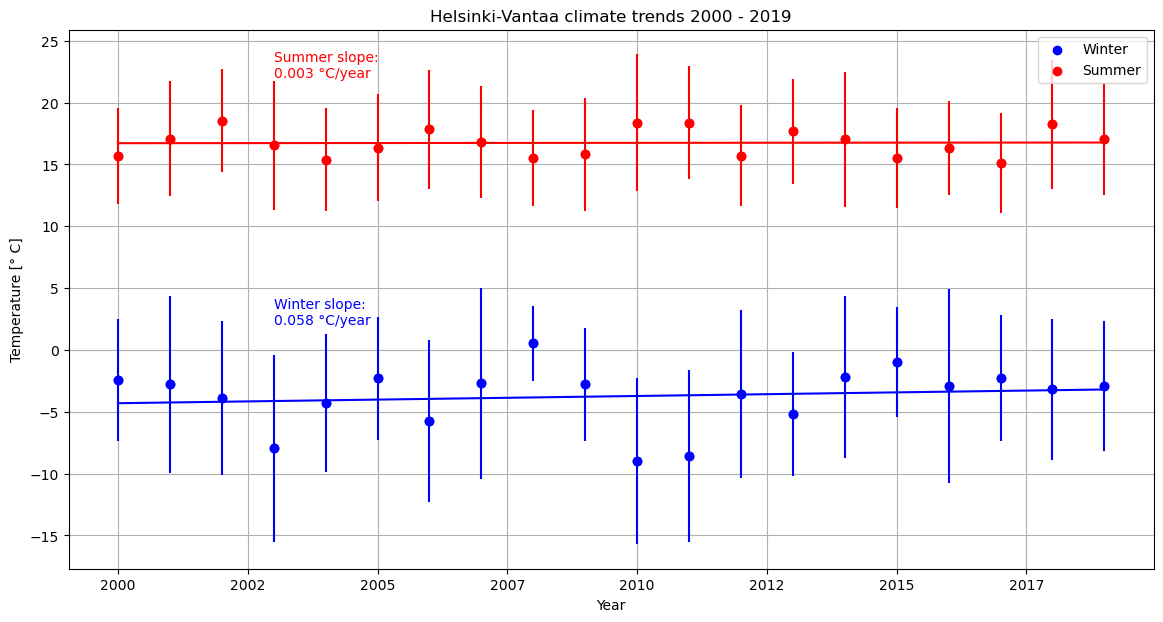

In [12]:
# Plot for last 20 years goes here

ax2 = None

# YOUR CODE HERE
fig2, ax2 = plt.subplots(figsize=(14, 7))
plot_data(fig2, ax2, years_20, winter_means_20, winter_std_20, summer_means_20, summer_std_20, data_20, slopes_20)

Figure x2 - Helsinki-Vantaa climate trends for the winter and summer seasons for the 2000 - 2019 period

## Problem 2 - Linear correlation: Is a line a good fit for our data? (6 points)

In Problem 1 we used least squares regressions to calculate lines that best fit our data. One thing we did not consider, however, was whether a line was a suitable model for our data. To consider this another way, we could ask ourselves how well do our data plot on a line? This question will be the focus of Problem 2, where we will calculate the linear correlation coefficient $r$ to explore how well our data fall on a line. Notably, in doing this we will *not* consider the standard deviations in our seasonal temperatures, only the mean values for the different seasons.

### Scores for this problem

**Your score on this problem will be based on following criteria**:

- Properly converting the linear correlation coefficient formula to a Python function and adding it to your `introqg_functions.py` script file.
- Calculating linear corelation coefficients for summer and winter and for the two different time periods
- Plotting your results
- Including comments that explain what most lines in the code do
- Uploading your notebook and modified script file to your GitHub repository for this week's exercise

### Part 1: A correlation coefficient function (1.5 points)

As we have seen in this week's lesson, the correlation coefficient $r$ can be used to determine how well two variables are linearly correlated with one another. In other words, how well does a line relate the two. Mathematically, we can define the correlation coefficient $r$ as

\begin{equation}
  \Large
  r = \frac{\sum{\left(x_{i} - \bar{x} \right)\left(y_{i} - \bar{y} \right)}}{\sqrt{\sum{\left(x_{i} - \bar{x} \right)^2} \sum{\left(y_{i} - \bar{y} \right)^2}}},
\end{equation}

where $x_{i}$ is the $i$th value along the $x$-axis, $\bar{x}$ is the mean of the values on the $x$-axis, and similarly for the values of $y$.

Your task in this part of the problem is to make a function for calculating $r$.

- Create a function `pearson()` in your `introqg_functions.py` script file that returns the correlation coefficient $r$ between two variables `x` and `y`

In [13]:
# Import your new function below using the format "from introqg_functions import pearson"
# (just copy and paste the text in quotes above in place of "raise NotImplementedError()")

# YOUR CODE HERE
from introqg_functions import pearson
import numpy as np

In [14]:
# These visible tests with fake data should work
from nose.tools import ok_, assert_equal

# Fake data for pearson tests
x1 = np.array([1.0, 2.0, 3.0])
y1 = np.array([1.0, 2.0, 2.1])
x2 = np.array([1.0, 2.0, 2.5, 3.6, 4.2, 5.9])
y2 = np.array([5.7, 4.2, 3.6, 5.4, 2.0, 1.0])

# Fake correlation coefficients
r1 = pearson(x1, y1)
r2 = pearson(x2, y2)

# Print results
print(f"Correlation coefficient for dataset 1: {r1:.4f}.")
print(f"Correlation coefficient for dataset 2: {r2:.4f}.")

# Check that the pearson function works
assert_equal(round(r1, 4), 0.9042)
assert_equal(round(r2, 4), -0.8156)

Correlation coefficient for dataset 1: 0.9042.
Correlation coefficient for dataset 2: -0.8156.


### Part 2: Calculating correlation coefficients (1.5 points)

Next, we can calculate the correlation coefficients for our weather data.

- Calculate correlation coefficients for the summer and winter and for both time ranges (the entire range of years, and 2000-2019) using your `pearson()` function.
You should name these values as follows:
    - Entire range of years: `r_winter` for winter and `r_summer` for summer
    - Last 20 years: `r_winter20` for winter, `r_summer20` for summer

In [15]:
r_winter = None
r_summer = None
r_winter20 = None
r_summer20 = None

# YOUR CODE HERE
r_winter = pearson(years, winter_means)
r_summer = pearson(years, summer_means)
r_winter20 = pearson(years_20, winter_means_20)
r_summer20 = pearson(years_20, summer_means_20)

In [16]:
# This test should work
print(f"Your winter (all years) correlation coefficient: {r_winter:.4f}. Expected value: 0.3145.")


Your winter (all years) correlation coefficient: 0.3145. Expected value: 0.3145.


In [17]:
# This test should work
print(f"Your summer (last 20 years) correlation coefficient: {r_summer20:.4f}. Expected value: 0.0148.")


Your summer (last 20 years) correlation coefficient: 0.0148. Expected value: 0.0148.


### Part 3: Plotting your results, round 2 (3 points)

Now we can generate a pair of plots showing the data along with the calculated $r$ values.

- Create 2 plots of the seasonal temperature data: (**1**) one for the entire time covered in the data and (**2**) another for the last 20 years of data
    - Plot the seasonal average temperature data as a Pandas scatter plot **without** error bars for the standard deviation in seasonal temperature
    - Also include the regression lines for each season from Problem 1 to compare to the yearly temperature data. You may want to consult [the hints for this week's exercise](https://introqg-site.readthedocs.io/en/latest/lessons/L2/exercise-2.html) about how to plot the regression lines.
    - Plot the temperature data for both seasons on the same plot, using a warm color (e.g., red) for summer and a cool color (e.g., blue) for winter. You can find some convenient color names you can use in the [Matplotlib documentation online](https://matplotlib.org/stable/gallery/color/named_colors.html).
    - Be sure to set the figure size to be slightly larger, as was done in Exercise 1
- Include axis labels, a title and a legend for each plot, as well as text displaying the correlation coefficients for both the summer and winter seasons
    - If your plot legend is empty, be sure that you have a label included for the scatter plot for each season with the text name of that season
- Add figure captions in the Markdown cell below each Python cell for your plots that describe the plots as if they were in a scientific journal article

/tmp/ipykernel_2800/4187601662.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(label) for label in ax.get_xticks()])


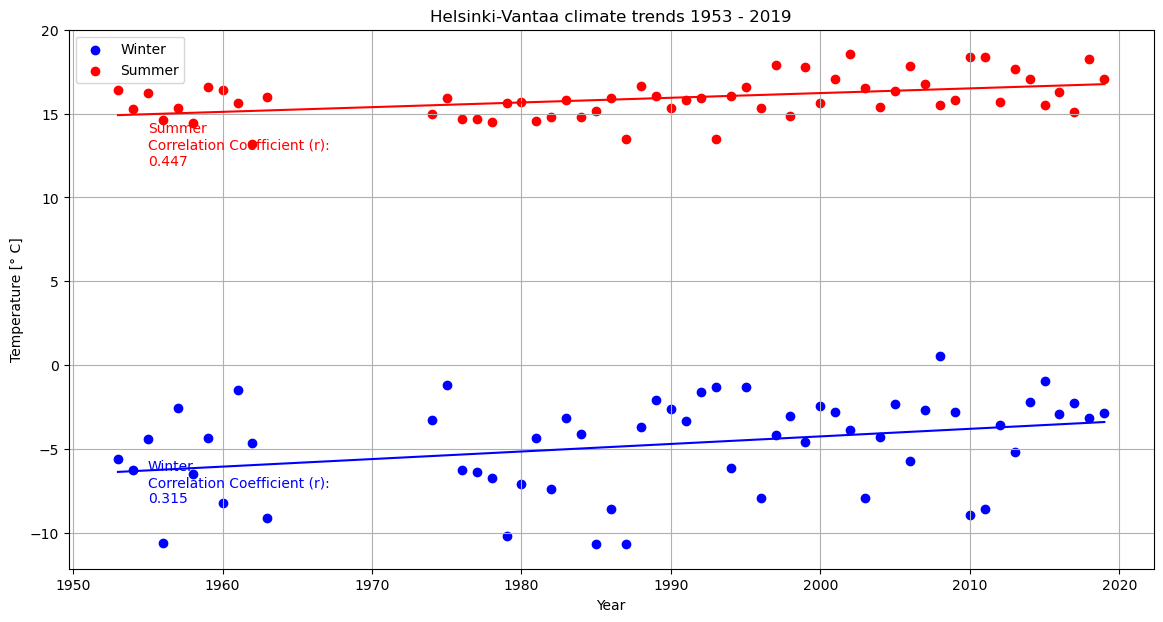

In [18]:
# Plot for all years goes here

ax3 = None

# YOUR CODE HERE
fig3, ax3 = plt.subplots(figsize=(14, 7))
r_values = {"Winter": r_winter, "Summer": r_summer}
plot_data(fig3, ax3, years, winter_means, winter_std, summer_means, summer_std, data, slopes, r_values, False)

Figure x1 - Helsinki-Vantaa climate trends for the winter and summer seasons for the 1953 - 2019 period, including correlation coefficient (r)

/tmp/ipykernel_2800/4187601662.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(label) for label in ax.get_xticks()])


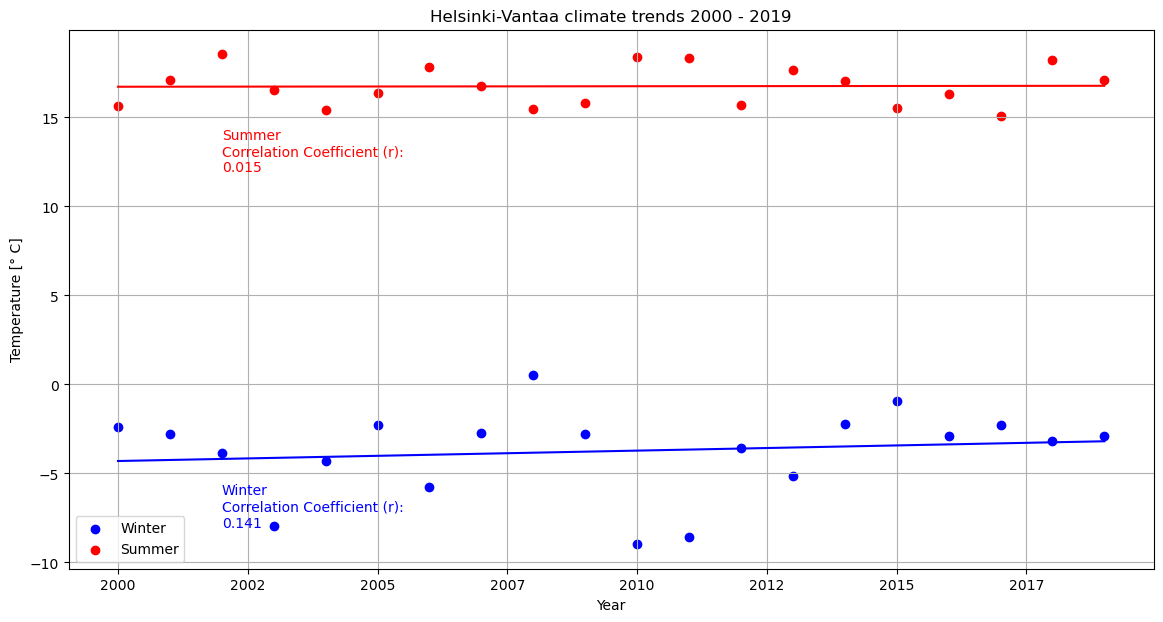

In [19]:
# Plot for the last 20 years goes here

ax4 = None

# YOUR CODE HERE
fig4, ax4 = plt.subplots(figsize=(14, 7))
r_values_20 = {"Winter": r_winter20, "Summer": r_summer20}
plot_data(fig4, ax4, years_20, winter_means_20, winter_std_20, summer_means_20, summer_std_20, data_20, slopes_20, r_values_20, False)

Figure x2 - Helsinki-Vantaa climate trends for the winter and summer seasons for the 2000 - 2019 period, including correlation coefficient (r)

## Problem 3: Calculating a goodness-of-fit (3.5 points)

The final part of the exercise this week is to calculate a goodness-of-fit for the lines fit to the data in Problem 1. The idea here is to consider that we have an expected value of the temperature based on our least-squares regressions, and we can see how well those expected values fit within the standard deviation of the seasonal temperatures.

### Scores for this problem

**Your score on this problem will be based on following criteria**:

- Properly converting the goodness-of-fit formula to a Python function and adding that function to your `introqg_functions.py` script file
- Calculating goodness-of-fit values for summer and winter and for the two different time periods
- Including comments that explain what most lines in the code do
- Uploading your notebook and modified script file to your GitHub repository for this week's exercise

### Part 1: A goodness-of-fit function (1.5 points)

We can start by creating a function to calculate the goodness-of-fit. For this, you can use the reduced chi-squared equation,

\begin{equation}
  \Large
  \chi^{2} = \frac{1}{N} \sum \frac{(O_{i} - E_{i})^{2}}{\sigma_{i}^2}
\end{equation}

where $N$ is the number of ages, $O_{i}$ is the $i$th observed value, $E_{i}$ is the $i$th expected value, and $\sigma_{i}$ is the $i$th standard deviation.

For this part you should:

- Create a function called `chi_squared` in your `introqg_functions.py` script file that can be used to calculate the reduced chi-squared value

In [20]:
# Import your new function below using the format "from introqg_functions import chi_squared"
# (just copy and paste the text in quotes above in place of "raise NotImplementedError()")

# YOUR CODE HERE
from introqg_functions import chi_squared

In [21]:
# These visible tests with fake data should work
from nose.tools import ok_, assert_equal

# Fake data
obs1 = np.array([1.1, 2.9, 2.6, 3.5, 5.7, 2.8])
exp1 = np.array([1.5, 2.4, 3.6, 1.5, 6.7, 2.6])
std1 = np.array([0.5, 1.4, 0.6, 1.5, 0.7, 1.0])

obs2 = np.array([1.8, 2.3, 2.2, 3.9, 5.5, 2.4])
exp2 = np.array([1.2, 2.0, 3.9, 1.7, 6.1, 2.9])
std2 = np.array([0.2, 0.4, 1.6, 2.5, 0.5, 0.3])

# Fake goodness-of-fit values
cs1 = chi_squared(obs1, exp1, std1)
cs2 = chi_squared(obs2, exp2, std2)

# Print results
print(f"Goodness-of-fit for dataset 1: {cs1:.4f}.")
print(f"Goodness-of-fit for dataset 2: {cs2:.4f}.")

# Check that the chi-squared function works
assert_equal(round(cs1, 4), 1.2340)
assert_equal(round(cs2, 4), 2.6139)

Goodness-of-fit for dataset 1: 1.2340.
Goodness-of-fit for dataset 2: 2.6139.


### Part 2: Calculating goodness-of-fit (2 points)

Next, we can calculate the goodness-of-fit for each point along our line and the corresponding observed seasonal mean temperaure. We will do this by first creating arrays of expected temperature values for each season and time period, and then calculating the goodness-of-fit between those expected values and the observed temperatures.

- Create 4 arrays that contain the expected temperature value for each year based on the equation for the regression lines calculated in Problem 1
    - The variables `exp_winter` and `exp_summer` can be used for all years, while `exp_winter20` and `exp_summer20` can be used for the last 20 years
- Calculate the goodness-of-fit between the expected values and the observed mean seasonal temperatures
    - The variables `gof_winter` and `gof_summer` can be used for all years, while `gof_winter20` and `gof_summer20` can be used for the last 20 years

In [22]:
# Expected temperatures based on least-squares regression in Problem 1
# YOUR CODE HERE

# Preparing data for full year
winter_means, exp_winter, winter_std = data['Winter mean'], data["Winter_mean_pred"], data['Winter std']
summer_means, exp_summer, summer_std = data['Summer mean'], data["Summer_mean_pred"], data['Summer std']
          
# Preparing data for data_20
winter_means_20, exp_winter20, winter_std_20 = data_20["Winter_mean_pred"], data_20['Winter mean'], data_20['Winter std']
summer_means_20, exp_summer20, summer_std_20 = data_20["Summer_mean_pred"], data_20['Summer mean'], data_20['Summer std']

# Goodness-of-fit values
gof_winter = chi_squared(winter_means, exp_winter, winter_std)
gof_summer = chi_squared(summer_means, exp_summer, summer_std)
gof_winter20 = chi_squared(winter_means_20, exp_winter20, winter_std_20)
gof_summer20 = chi_squared(summer_means_20, exp_summer20, summer_std_20)

In [23]:
# This test should work
print(f"My mean expected winter temperature: {mean(exp_winter):.4f}. Expected value: -4.7524.")


My mean expected winter temperature: -4.7524. Expected value: -4.7524.


In [24]:
# This test should work
print(f"My summer (all years) goodness-of-fit: {gof_summer:.4f}. Expected value: 0.0653.")


My summer (all years) goodness-of-fit: 0.0653. Expected value: 0.0653.


In [25]:
# Run this cell to print all of your calculated goodness-of-fit values
print(f"My winter goodness-of-fit values:\n    All years:     {gof_winter:.4f}\n    Last 20 years: {gof_winter20:.4f}\n")
print(f"My summer goodness-of-fit values:\n    All years:     {gof_summer:.4f}\n    Last 20 years: {gof_summer20:.4f}")

My winter goodness-of-fit values:
    All years:     0.2292
    Last 20 years: 0.2208

My summer goodness-of-fit values:
    All years:     0.0653
    Last 20 years: 0.0634


## Summary questions for Exercise 2 (2 points; 0.5 points each)

Answer the questions below in a few sentences.

1. Based on the least-squares regressions calculated in Problem 1, how have summer and winter temperatures changed in Helsinki over the time 1953-2019? Is the trend similar for both seasons? What about when you consider only the data over the last 20 years? Do you have any first-hand experience that relates to these temperature trends? If so, what?
2. Based on the calculation of the correlation coefficients in Problem 2, how well does it seem the data are fit by a line? Are there any significant differences between seasons or time periods in the calculated $r$ values?
3. Looking at the goodness-of-fit values calculated in Problem 3, how well does it appear the data are fit by a regression line? Do you see differences between seasons ot time period considered? 
4. Comparing the calculated $\chi^{2}$ values from Problem 3 to the $r$ values in Problem 2, what differences do you see in the numbers between seasons and/or time periods? Can you think of reasons why the $r$ and $\chi^{2}$ values might differ in terms of their relative values in each season/time period? How are the $r$ and $\chi^{2}$ values different in terms of what they measure?

In [35]:
print(gof_winter, gof_summer, gof_winter20, gof_summer20)

0.2292170380742411 0.06525237013279504 0.22078768528364673 0.06344061564925835


1.1. Temperature in Helsinki changed over the time period 1953-2019:   
- summer: slope (0.028) was positive 
- winter: slope (0.045) was positive, same order of magnitude as summer but about double the slope value

1.2. Temperature in Helsinki changed over the time period 2000-2019:
- summer: slope (0.003) was positive, one order of magnitude smaller than in the 1953-2019 time period for the same season
- winter: slope (0.058) was positive, simmilar to winter slope over the 1953-2019 time period 

2.1. Temperature in Helsinki over the time period 1953-2019:   
- summer: R was 0.45
- winter: R was 0.31

2.2. Temperature in Helsinki over the time period 2000-2019:
- summer: R was 0.02
- winter: R was 0.14

2.3 - Correlation coefficients are considered quite low for all R calculations. 
At best, observed values are fitting the line of the expected results by 45% in summer over the time period 1953-2019.
R values are highest when there are more observations, i.e. within the full 1953-2019 time period.

3.1. Temperature in Helsinki over the time period 1953-2019:   
- summer: gof was 0.06
- winter: gof was 0.23

3.2. Temperature in Helsinki over the time period 2000-2019:
- summer: gof was 0.06
- winter: gof was 0.22

3.3 - There is a one order of magnitude difference in goodness of fit (gof) between seasons.
Wnter has a higher gof than summer.
In winte, the predicted least squares regression line runs well-within the corresponding std vertical lines.

4. The chi-squares values are weighted by the nr of observations, therefore, this factor shuldn't impact its time-period comparisons.   
The seasonal aspect is influencing the chi-squares values given the differences in the size of the std lines for both seasons.   
The winter std lines are bigger, possibly because there has been a higher variability (possibly more extreme - higher? - temperatures) during the winter seasons.   
The R fits how well does the prediction line fits the observation points. That is the case, for instance for summer over the time period 1953-2019.   
The r value might be a good way to confirm long-term trends/slopes.   
The chi-squared value might be a good way to compare seasonal effects over different time-periods.